In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import glob
import cv2
import pandas as pd

# TCIA-LGG

<div style="text-align: justify"> Este conjunto de datos contiene imágenes de RM cerebral junto con máscaras manuales de segmentación de anomalías FLAIR. Las imágenes se obtuvieron de The Cancer Imaging Archive (TCIA). Corresponden a 110 pacientes incluidos en la colección de gliomas de grado inferior de The Cancer Genome Atlas (TCGA) con al menos datos de secuencia de recuperación de inversión atenuada por fluidos (FLAIR) y clústeres genómicos disponibles. Los clusters genómicos del tumor y los datos de los pacientes se proporcionan en el archivo data.csv.
Todas las imágenes se proporcionan en formato .tif con 3 canales por imagen. Para 101 casos, se dispone de 3 secuencias, es decir, precontraste, FLAIR, postcontraste (en este orden de canales). En 9 casos falta la secuencia de poscontraste y en 6 casos falta la secuencia de precontraste. Las secuencias que faltan se sustituyen por la secuencia FLAIR para que todas las imágenes sean de 3 canales. Las máscaras son imágenes binarias de 1 canal. Segmentan la anormalidad FLAIR presente en la secuencia FLAIR (disponible para todos los casos).
El conjunto de datos está organizado en 110 carpetas denominadas según el ID del caso que contiene información sobre la institución de origen. Cada carpeta contiene imágenes de RM con la siguiente convención de nomenclatura:
TCGA_(código de institución)_(identificación del paciente)_(número de corte).tif
Las máscaras correspondientes tienen un sufijo _mask. </div>

Imágene totales 3929 en cortes axiales.

**Las imágenes originales son de 3 canales (precontrast, FLAIR, postcontrast) de 256$\times$256. No normalizado de *uint8*. son 110 participantes**

**Las mascaras son de 3 canales correspondientes a las 3 imágene MR de 256$\times$256. Normalizado de *uint8***


Precontraste ponderado en T1 (T1), poscontraste ponderado en T1 (T1-Gd), T2 y T2-FLAIR [Ref](https://www.nature.com/articles/sdata2017117).




In [ ]:
folders=glob.glob('/content/drive/MyDrive/Brain_tumors_v2/Datasets/TCIA_LGG/TCGA*')
dataCSV=pd.read_csv('/content/drive/MyDrive/Brain_tumors_v2/Datasets/TCIA_LGG/data.csv')
#sz=np.shape(folders); print('Carpetas y sujetos', sz); print(dataCSV.keys())

- histological_type: 1 (33), 2 (29), 3 (47), nan (1)
- neoplasm_histologic_grade: 1 (51), 2 (58), nan (1)

Text(0.5, 1.0, 'cortes por sujeto')

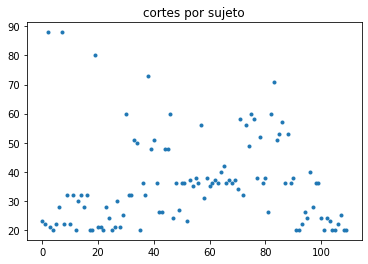

In [ ]:
sub=[]
for fd in folders:
  images=glob.glob(fd+'/*[0-9].tif')
  masks =glob.glob(fd+'/*mask.tif')
  sub=np.append(sub, np.shape(images)[0])
plt.plot(sub, '.'); plt.title('cortes por sujeto')

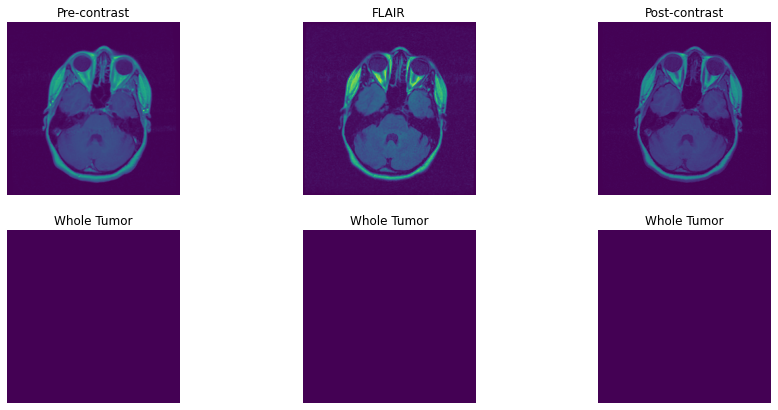

In [ ]:
id=np.random.choice(sz[0])
images=glob.glob(folders[id]+'/*[0-9].tif')
ps=np.random.choice(np.shape(images)[0])

ima=cv2.imread(images[ps])
msk=cv2.imread(images[ps].replace('.tif','_mask.tif'))
plt.figure(figsize=(15,7))
for n,seq in enumerate(['Pre-contrast', 'FLAIR', 'Post-contrast']):
  plt.subplot(2,3,n+1)
  plt.imshow(ima[...,n], vmin=0, vmax=255)
  plt.title(seq)
  plt.axis('off')

  plt.subplot(2,3,n+1+3)
  plt.imshow(msk[...,n], vmin=0, vmax=255)
  plt.title('Whole Tumor')
  plt.axis('off')

In [ ]:
'''histological_type=[]
neoplasm_histologic_grade=[]
size_tumor=[]
imaseq=[]
maskse=[]
chn=0

for nx,fol in enumerate(folders):
  subjet=fol[fol.rfind('/TCGA')+1:]
  subjet=subjet[:subjet.rfind('_')]
  try:
    uno=int(dataCSV.loc[dataCSV.loc[:,'Patient']==subjet,:].loc[:,'histological_type'])
  except:
    uno=-1
  try:
    dos=int(dataCSV.loc[dataCSV.loc[:,'Patient']==subjet,:].loc[:,'neoplasm_histologic_grade'])
  except:
    dos=-1

  images=glob.glob(fol+'/*[0-9].tif')
  T1=np.zeros((np.shape(images)[0], 256, 256))
  mk=np.zeros((np.shape(images)[0], 256, 256))

  for n,ima in enumerate(images):
    imar=cv2.imread(ima)
    mask=cv2.imread(ima.replace('.tif','_mask.tif'))
    T1[n]=imar[...,chn]/255.
    mk[n]=mask[...,chn]
    histological_type=np.append(histological_type, uno)
    neoplasm_histologic_grade=np.append(neoplasm_histologic_grade, dos)
    size_tumor=np.append(size_tumor, np.sum(mk[n]!=0))

  if nx==0:
    imaseq=T1
    maskse=mk
  else:
    imaseq=np.concatenate((imaseq, T1))
    maskse=np.concatenate((maskse, mk))

imaseq=imaseq.astype('float32')
maskse=maskse.astype('float32')

sio.savemat('/content/drive/MyDrive/Brain_tumors_v2/Datasets/TCIA_LGG/T1.mat',
            {'histological_type':histological_type,
             'neoplasm_histologic_grade':neoplasm_histologic_grade,
             'size_tumor':size_tumor,
             'images':imaseq,
             'masks':maskse})'''

In [ ]:
data=sio.loadmat('/content/drive/MyDrive/Brain_tumors_v2/Datasets/TCIA_LGG/T1.mat')

In [ ]:
def count(image, mask): 
  uno,_=cv2.findContours((mask*255).astype('uint8'), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  ref=np.zeros((256,256,3), np.dtype('uint8'))
  for i in range(3):
    ref[...,i]=(image*255).astype('uint8')
  gra=cv2.drawContours(ref, uno, -1, (255,0,0), 1)
  return gra

0.0
0


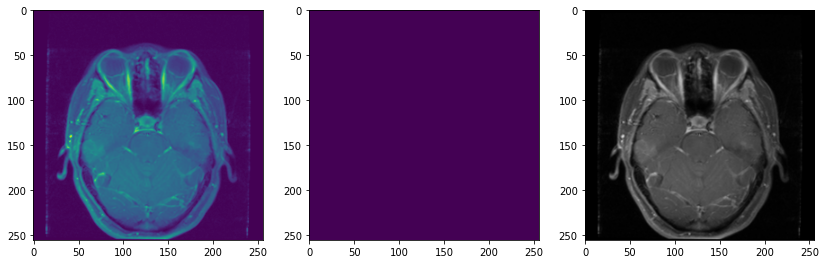

In [ ]:
ix=np.random.choice(3929)
imx=data['images']
mkx=data['masks']
print(data['size_tumor'][0,ix])
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
plt.imshow(imx[ix])
plt.subplot(1,3,2)
plt.imshow(mkx[ix])
plt.subplot(1,3,3)
plt.imshow(count(imx[ix],mkx[ix]))
print(np.sum(mkx[ix]!=0))

# BraTS
Todas las exploraciones multimodales de BraTS están disponibles como archivos NIfTI (.nii.gz) y describen a) volúmenes nativos (T1) y b) ponderados en T1 (T1Gd) después del contraste, c) ponderados en T2 (T2), y d) volúmenes de recuperación de la inversión atenuada por fluidos en T2 (T2-FLAIR), y fueron adquiridos con diferentes protocolos clínicos y varios escáneres de múltiples (n=19) instituciones, mencionadas como contribuyentes de datos aquí.

Todos los conjuntos de datos de imágenes han sido segmentados manualmente, por uno a cuatro evaluadores, siguiendo el mismo protocolo de anotación, y sus anotaciones fueron aprobadas por neurorradiólogos experimentados. Las anotaciones comprenden el tumor con realce GD (ET - etiqueta 4), el edema peritumoral (ED - etiqueta 2), y el núcleo tumoral necrótico y sin realce (NCR/NET - etiqueta 1), como se describe tanto en el documento TMI del BraTS 2012-2013 como en el último documento de resumen del BraTS. Los datos proporcionados se distribuyen después de su preprocesamiento, es decir, co-registrados a la misma plantilla anatómica, interpolados a la misma resolución (1 mm^3) y con corte de cráneo.

Imágene totales 57.195 en cortes axiales.

**Las imágenes originales son de 4 canales (

- native (T1) 
- post-contrast T1-weighted (T1Gd)
- T2-weighted (T2)
- T2 Fluid Attenuated Inversion Recovery (T2-FLAIR).

de 240$\times$240. No normalizado de *'<f8'*. son 369 participantes con 155 cortes axiales cada uno**

**Las máscaras originales son de 3 canales (

- Necrotic and Non-Enhancing Tumor Core (NCR/NET)
- GD-Enhancing Tumor (ET)
- Peritumoral Edema (ED)

de 240$\times$240. Normalizado de *'int8'*.


In [ ]:
np.shape(glob.glob('/content/drive/MyDrive/Brain_tumors_v2/Datasets/BraTs/BraTS2020_training_data/content/data/*'))

(57198,)

In [ ]:
datos=glob.glob('/content/drive/MyDrive/Brain_tumors_v2/Datasets/BraTs/BraTS2020_training_data/content/data/*.h5')
szd=np.shape(datos)[0]
datac=pd.read_csv('/content/drive/MyDrive/Brain_tumors_v2/Datasets/BraTs/BraTS20 Training Metadata.csv')
print(szd)

0


In [ ]:
datosxxx=glob.glob('/content/drive/MyDrive/Brain_tumors_v2/Datasets/BraTs/BraTS2020_training_data/content/data/*.csv')

In [ ]:
datac

,slice_path,target,volume,slice,label0_pxl_cnt,label1_pxl_cnt,label2_pxl_cnt,background_ratio
0,../input/brats2020-training-data/BraTS2020_tra...,0,41,0,0,0,0,1.0
1,../input/brats2020-training-data/BraTS2020_tra...,0,41,1,0,0,0,1.0
2,../input/brats2020-training-data/BraTS2020_tra...,0,41,2,0,0,0,1.0
3,../input/brats2020-training-data/BraTS2020_tra...,0,41,3,0,0,0,1.0
4,../input/brats2020-training-data/BraTS2020_tra...,0,41,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...
57190,../input/brats2020-training-data/BraTS2020_tra...,0,241,150,0,0,0,1.0
57191,../input/brats2020-training-data/BraTS2020_tra...,0,241,151,0,0,0,1.0
57192,../input/brats2020-training-data/BraTS2020_tra...,0,241,152,0,0,0,1.0
57193,../input/brats2020-training-data/BraTS2020_tra...,0,241,153,0,0,0,1.0


In [ ]:
pd.read_csv(datosxxx[2])

IndexError: ignored

In [ ]:
index=[]
for i in datos:
  index=np.append(index, i[91:i.rfind('_slice_')])

In [ ]:
dic={}
for j in index:
  if j in dic:
    dic[j]=dic[j]+1
  else:
    dic[j]=1

In [ ]:
sequ =['Native\n(T1)','Post-contrast T1-weighted\n(T1Gd)','T2-weighted\n(T2)','T2 Fluid Attenuated\nInversion Recovery\n(T2-FLAIR)']
tumor=['Necrotic and\nNon-Enhancing Tumor\n(NCR/NET)','Enhancing Tumor\n(ET)','Peritumoral Edema\n(ED)', 'Whote Tumor']

In [ ]:
import h5py
filename = datos[np.random.choice(szd)]

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())

    # Get the data
    image = list(f['image'])
    mask  = list(f['mask'])

plt.figure(figsize=(15,9))
for i in range(4):
  plt.subplot(2,4,i+1)
  plt.imshow(np.array(image)[...,i])
  plt.title(sequ[i])
  plt.axis('off')
  if i==3:
    plt.subplot(2,4,i+5)
    plt.imshow(np.array(mask)*255)
    plt.title(tumor[i])
    plt.axis('off')
  else:
    plt.subplot(2,4,i+5)
    plt.imshow(np.array(mask)[...,i])
    plt.title(tumor[i])
    plt.axis('off')

### BTD
Este conjunto de datos de tumores cerebrales contiene 3064 imágenes ponderadas en T1 con contraste de 233 pacientes con tres tipos de tumores cerebrales: meningioma (708 cortes), glioma (1426 cortes) y tumor hipofisario (930 cortes).

**Las imágenes originales son de un solo canal de 512$\times$512. No normalizado de int16. 233 pacientes** 



In [ ]:
mat=sio.loadmat('/content/drive/MyDrive/Brain_tumors_v2/Datasets/BTD/images_mat_split0.mat') #Sujetos e imágenes
print(mat.keys())

In [ ]:
tumr=['meningioma', 'glioma', 'pituitary tumor']

In [ ]:
plt.figure(figsize=(15,9))
for i in range(3):
  id=np.random.choice(szz)
  plt.subplot(2,3,i+1)
  plt.title('T1-weighted\nContrast-Inhanced')
  plt.imshow(mat['images'][id])
  plt.axis('off')
  plt.subplot(2,3,i+4)
  plt.title(tumr[mat['labels'][0][id]-1])
  plt.imshow(mat['masks'][id])
  plt.axis('off')

### Conjunto de datos de Detección

Imagenes axiales con tumores 155, sin tumores 98 [kaggle2](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection)

In [ ]:
folno=glob.glob('/content/drive/MyDrive/Brain_tumors_v2/Datasets/MRIDetection/brain_tumor_dataset/no/*')
folsi=glob.glob('/content/drive/MyDrive/Brain_tumors_v2/Datasets/MRIDetection/brain_tumor_dataset/yes/*')

In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean

#image = color.rgb2gray(data.astronaut())

#image_rescaled = rescale(image, 0.25, anti_aliasing=False

In [ ]:
sx=len(folno)
mtx=np.zeros((sx,256,256))
for i,n in enumerate(folno):
  ima=cv2.imread(n, 0)
  ax=np.argmax(np.shape(ima))
  mx=np.max(np.shape(ima))

  new=rescale(ima, 256./mx)
  new=(new-np.min(new))/(np.max(new)-np.min(new))
  ini=int((256-np.shape(new)[1-ax])/2)
  if ax==0:
    mtx[i,:,ini:ini+np.shape(new)[1-ax]]=new
  if ax==1:
    mtx[i,ini:ini+np.shape(new)[1-ax],:]=new
mtx=mtx.astype('float32')

In [ ]:
sx=len(folsi)
mtx2=np.zeros((sx,256,256))
for i,n in enumerate(folsi):
  ima=cv2.imread(n, 0)
  ax=np.argmax(np.shape(ima))
  mx=np.max(np.shape(ima))

  new=rescale(ima, 256./mx)
  new=(new-np.min(new))/(np.max(new)-np.min(new))
  ini=int((256-np.shape(new)[1-ax])/2)
  if ax==0:
    mtx2[i,:,ini:ini+np.shape(new)[1-ax]]=new
  if ax==1:
    mtx2[i,ini:ini+np.shape(new)[1-ax],:]=new
mtx2=mtx2.astype('float32')

(256, 256) (98, 256, 256)


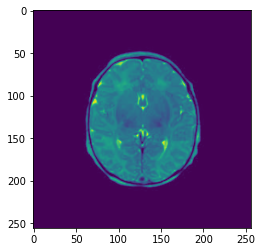

In [ ]:
ix=np.random.choice(np.shape(mtx)[0])
print(np.shape(mtx[ix]), np.shape(mtx))
plt.imshow(mtx[ix])

(256, 256) (155, 256, 256)


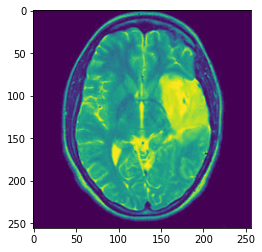

In [ ]:
ix=np.random.choice(np.shape(mtx2)[0])
print(np.shape(mtx2[ix]), np.shape(mtx2))
plt.imshow(mtx2[ix])

In [ ]:
sio.savemat('/content/drive/MyDrive/Brain_tumors_v2/Datasets/MRIDetection/images.mat', {'tumor': mtx2, 'normal': mtx})